In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import fiona
import geopandas as gpd

### Prepare data

In [2]:
# Get the shape file for the Europe Map
shapefile = "../raw_data/WorldMap/ne_110m_admin_0_countries.shp"
geo_df = gpd.read_file(shapefile)

In [3]:
country_names = ['Netherlands', 'Germany','Italy','Spain','UK']
data = {}
sd = {}

s_data = {}
s_sd = {}
for country in country_names:
    df_before = pd.read_csv('mcmc_data/'+country+"/fLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/fLock_after.csv")
    data[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    sd[country] = [df_before.loc[4][2], df_after.loc[4][2]]

    df_before = pd.read_csv('mcmc_data/'+country+"/sLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/sLock_after.csv")
    s_data[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    s_sd[country] = [df_before.loc[4][2], df_after.loc[4][2]]

In [10]:
def barplotReproduction(df, df_sd, saveLoc, title, ylabel):
    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, yerr=df_sd, error_kw=dict( capsize=3, color='black', alpha=0.5, marker='x'))
    #ax = df.plot(kind='bar') # "same" as above
    ax.set_xlabel('Country')
    ax.legend(["First Analysis", "Second Analysis", "Standard Deviation"], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.savefig(saveLoc, dpi=300, bbox_inches = "tight")


## First Lockdown

In [ ]:
country_names = ['Netherlands', 'Germany','Italy','Spain','UK']
def getData(value):
    data = {}
    sd = {}
    for country in country_names:
        df_before = pd.read_csv('mcmc_data/'+country+"/fLock_before.csv")
        df_after = pd.read_csv('mcmc_data/'+country+"/fLock_after.csv")
        data[country] = [df_before.loc[value][1],df_after.loc[value][1]]
        sd[country] = [df_before.loc[value][2], df_after.loc[value][2]]
    return data, sd

### Infection Rate

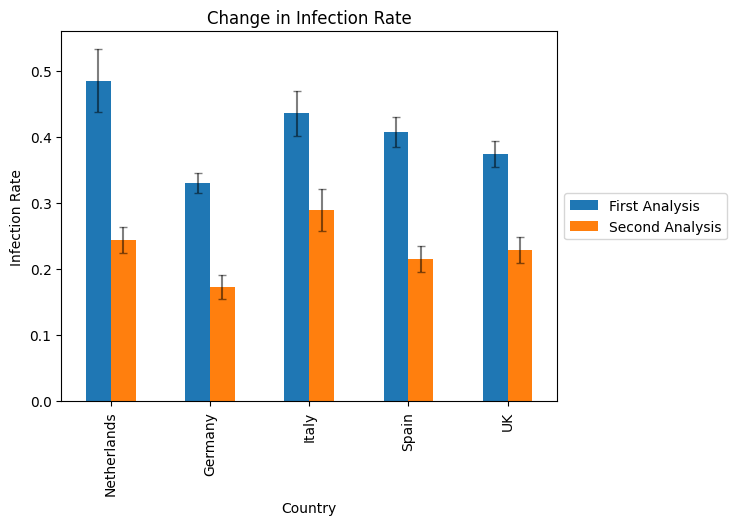

In [20]:
data, sd = getData(0)
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd, 'results/first_q/barplot_r.png',"Change in Infection Rate","Infection Rate")

### Recovery Rate

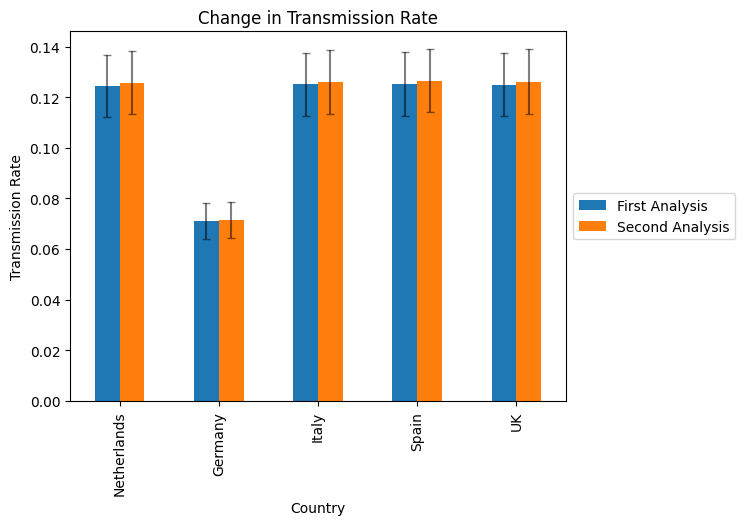

In [19]:
data, sd = getData(1)
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd, 'results/first_q/barplot_r.png',"Change in Transmission Rate","Transmission Rate")

### Mortality Rate

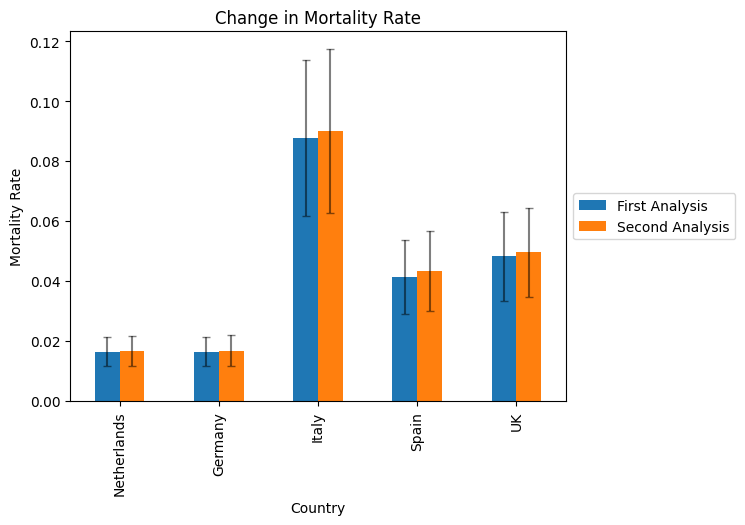

In [18]:
data, sd = getData(2)
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd, 'results/first_q/barplot_r.png',"Change in Mortality Rate","Mortality Rate")

### Reproduction Number

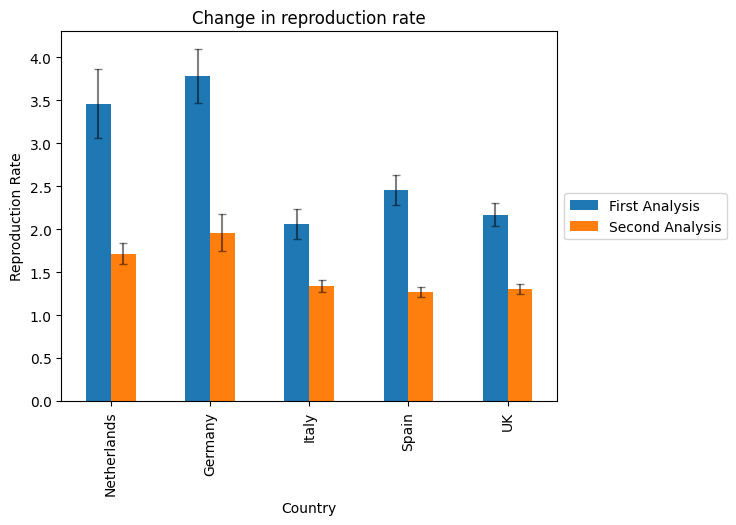

In [24]:
data, sd = getData(4)
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd, 'results/first_q/barplot_r.png',"Change in reproduction rate","Reproduction Rate")

### Our World In Data

In [9]:
country_names = ['Netherlands', 'Germany','Italy','Spain','UK']
owid_values = [[2.16,1.30],[2.0,1.35],[2.20,1.30],[1.9,1.3],[2.22,1.45],[1.84,1.33]]
df_owid = {}
for index, country in enumerate(country_names):
    df_owid[country] = owid_values[index]


Text(0.5, 1.0, 'Reproduction Rate before and after Lockdown (Our World In Data)')

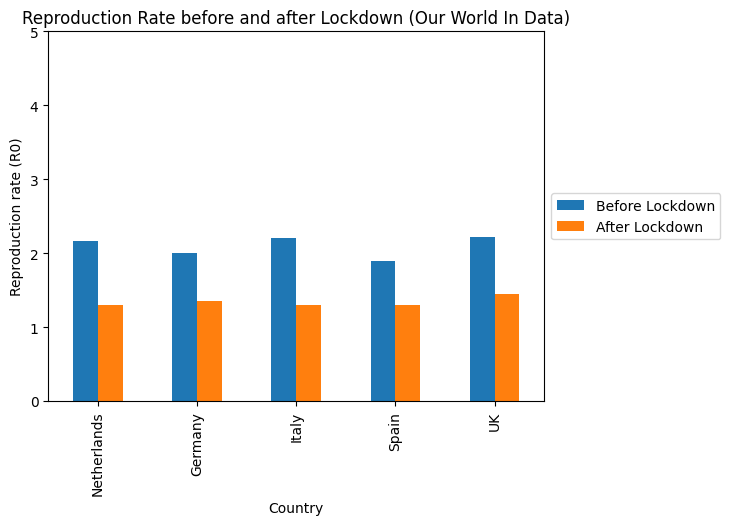

In [10]:
fig, ax = plt.subplots()
pd.DataFrame(df_owid).T.plot(kind='bar', ax=ax, error_kw=dict( capsize=3, color='black', alpha=0.5, marker='x'))
#ax = df.plot(kind='bar') # "same" as above
ax.set_xlabel('Country')
ax.legend(["Before Lockdown", "After Lockdown", "Standard Deviation"], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ybound(0,5)
ax.set_ylabel('Reproduction rate (R0)')
ax.set_title('Reproduction Rate before and after Lockdown (Our World In Data)')

### World Map

In [11]:
df = pd.DataFrame(data).T
df.columns = ['before_R0','after_R0']
df['SOVEREIGNT'] = ['Netherlands', 'Germany','Italy','Spain','UK']
# General Information
country_list = ['Netherlands', 'France','Germany','Italy','Spain','UK']
col = "Example"
map_df = geo_df[geo_df['NAME'].isin(country_list)]
map_df = map_df.merge(df, on=['SOVEREIGNT'])

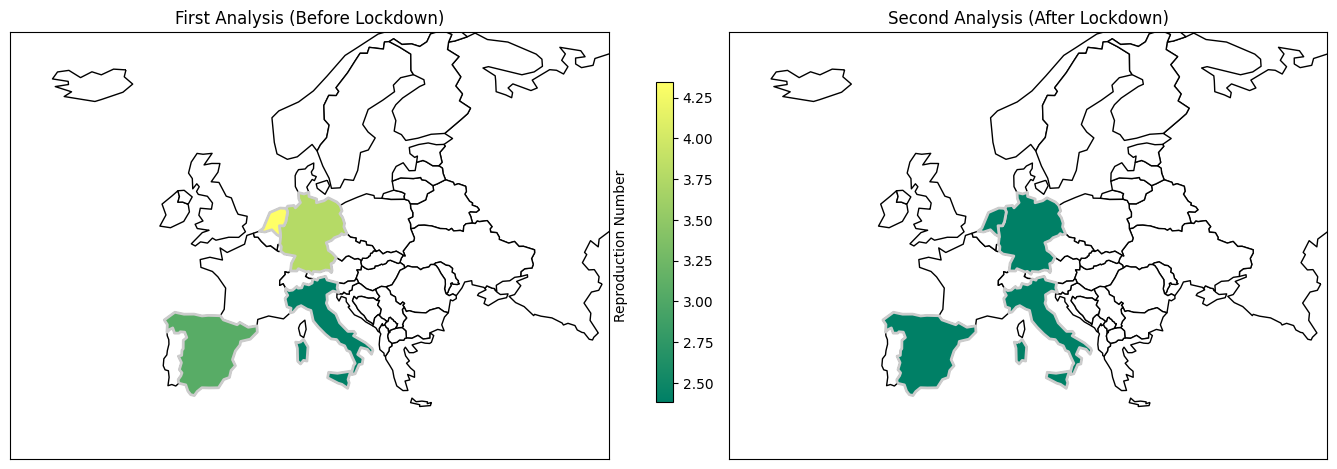

In [14]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(17,8))    

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

col = 'before_R0'
vmin = df[col].min()
vmax = df[col].max()

# Adding Cmap to 
cmap = 'summer'

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=2, cmap=cmap)
cbaxes = fig.add_axes([0.505, 0.30, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)
ax.set_ylabel("Reproduction Number")
ax.yaxis.set_label_position("right")
ax.set_title('First Analysis (Before Lockdown)')

col = 'after_R0'
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax2, color='white', edgecolor='black')
# Adding Cmap to 
map_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=2, cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax),)
# Setting Axis limits
ax2.set_xlim(-30, 50)
ax2.set_ylim(30, 70)
ax2.set_xticks=[]
ax2.set_title('Second Analysis (After Lockdown)')
ax2.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
ax.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
plt.savefig('results/first_q/europe_map.png')

## Second Lockdown

### Bar plot

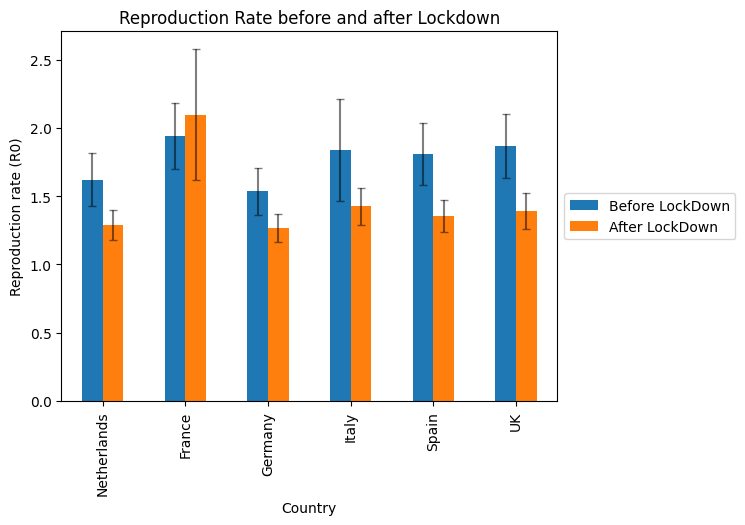

In [32]:
df = pd.DataFrame(s_data).T
df_sd = pd.DataFrame(s_sd).T
barplotReproduction(df,df_sd, 'results/second_q/barplot_r.png')

### World Map

In [11]:
df = pd.DataFrame(s_data).T
df.columns = ['before_R0','after_R0']
df['SOVEREIGNT'] = ['Switzerland','Netherlands','France','Germany','Italy','Spain','United Kingdom']
df
# General Information
country_list = ['France','Germany','Italy','Spain','United Kingdom']
col = "Example"
map_df = geo_df[geo_df['NAME'].isin(country_list)]
map_df = map_df.merge(df, on=['SOVEREIGNT'])
map_df.loc[map_df['SOVEREIGNT'] == 'Spain', 'before_R0'] = 1.7


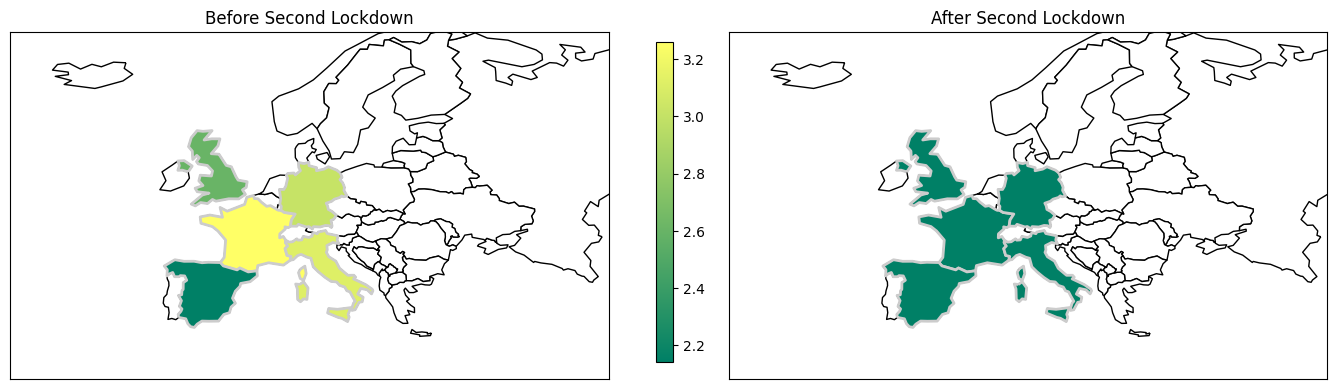

In [15]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(17,8))    

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

col = 'before_R0'
vmin = df[col].min()
vmax = df[col].max()

# Adding Cmap to 
cmap = 'summer'

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
map_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=2, cmap=cmap)
cbaxes = fig.add_axes([0.505, 0.30, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)
ax.set_title('Before Second Lockdown')

col = 'after_R0'
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax2, color='white', edgecolor='black')
# Adding Cmap to 
map_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=2, cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Setting Axis limits
ax2.set_xlim(-30, 50)
ax2.set_ylim(30, 70)
ax2.set_xticks=[]
ax2.set_title('After Second Lockdown')
ax2.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
ax.tick_params(
    axis='both',        # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False, 
    left=False,
    labelleft=False,        # ticks along the top edge are off
    labelbottom=False)
plt.savefig('results/second_q/europe_map.png')